In [1]:
import tensorflow as tf

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm
import os

In [2]:
# open the .txt file which have names of videos
f = open("videolist.txt", "r")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
data = pd.DataFrame()
data['video_name'] = videos
data = data[:-1]
data.head()

,video_name
0,cell/01.mp4 1


In [3]:
labels = {'cell': 0, 'door': 1, 'pass': 2, 'shake': 3, 'throw': 4, 'type': 5, 'wave': 6, 'write': 7}

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from PIL import Image

# model = VGG16(weights='imagenet', include_top=False)
# load pre-trained model
base_model = VGG16(weights='imagenet')
# define model from base model for feature extraction from fc2 layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [5]:
data_features=[]
data_label=[]
# storing the frames from training videos
for i in tqdm(range(data.shape[0])):
    
    videoFile = data['video_name'][i]
    cap = cv2.VideoCapture('NUSFPID/'+videoFile.split(' ')[0])   # capturing the video from the given path
    success, photo = cap.read()
    count = 0
    data_folder = 'video/'+videoFile.split(' ')[0].split('.')[0]
#     os.makedirs(train_folder)
#     print(train_folder)
    feature_list= []
    while success:
        frame_addr = (data_folder[:-3]+'_'+data_folder[-2:]+ "_frame_%d.jpg" %count)
        cv2.imwrite(frame_addr, photo)

        img = image.load_img(frame_addr, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        
#         print(img_data.shape)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        feature_list.append(vgg16_feature_np.flatten())
        
        
        success, photo = cap.read()
        count += 1
    #store 
    data_features.append(np.array(feature_list))
    data_label.append(labels[videoFile.split('/')[0]])

data_features_np = np.array(data_features)
data_label_np = np.array(data_label)

  0%|          | 0/1 [00:00<?, ?it/s]

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 

  0%|          | 0/1 [00:45<?, ?it/s]


KeyboardInterrupt: 

### Save model if required

In [6]:
# Save extracted features and labels
np.save('features_4k.npy', data_features_np)
np.save('labels_4k.npy', data_label_np)

### Load model if required

In [2]:
# Load extracted features and labels
data_features_np = np.load('features_4k.npy', allow_pickle=True)
data_label_np = np.load('labels_4k.npy')

# Use 1D CNN for pooling instead of standard Max or Avg pooling

In [3]:
# Get the minimum number of frames of the videos
min_frames = 2000
for i in range(data_features_np.shape[0]):
    if data_features_np[i].shape[0] < min_frames:
        min_frames = data_features_np[i].shape[0]
print('Min number of frames in dataset videos: ',min_frames)    

Min number of frames in dataset videos:  54


In [4]:
# Get the maximum number of frames of the videos
max_frames = 0
for i in range(data_features_np.shape[0]):
    if data_features_np[i].shape[0] > max_frames:
        max_frames = data_features_np[i].shape[0]
print('Max number of frames in dataset videos: ',max_frames) 

Max number of frames in dataset videos:  447


### Fixing the length of frames: Method 1
### Sample frames of each video regarding the no. of its frames

In [5]:
#We have to sample the frames of each video, due to inequality in videos' number of frames
#so that number of frames for each video will be a
#fixed value of 54 (Minimum number of frames of the videos in Dataset)
X = np.zeros((153 , 54, 4096))
for i in range(data_features_np.shape[0]):
    #Specify the step to sample frames regarding the number of frames
    step = data_features_np[i].shape[0] // min_frames
    
    frame_features = data_features_np[i]
    sample = frame_features[0, :]
    for j in range(0 + step, step * min_frames, step):
        sample = np.column_stack((sample, frame_features[j, :]))
    X[i] = sample.T   

y = data_label_np    

### Fixing the length of frames: Method 2
### Consider the max no. of frames and use zero padding for videos with less frames

In [6]:
#We have to insert zero padding for the videos with frames less than max number of frames in a dataset video
# X = np.zeros((153 , max_frames, 4096))
# for i in range(data_features_np.shape[0]):
#     X[i, :data_features_np[i].shape[0], :data_features_np[i].shape[1]] = data_features_np[i]

# y = data_label_np  

In [7]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, stratify = y)

In [8]:
# normalizing the data to help with the training
X_train /= np.max(X_train)
X_test /= np.max(X_train)

In [8]:
unique , count = np.unique(y_train, return_counts=True)
num_class =  len(unique)

In [9]:
# one-hot encoding using keras' numpy-related utilities
y_test_Cat = y_test
y_train = np_utils.to_categorical(y_train, num_class)
y_test = np_utils.to_categorical(y_test, num_class)

In [10]:
X_train.shape

(107, 54, 4096)

In [11]:
X_train = np.transpose(X_train, (0, 2, 1))
X_train.shape

(107, 4096, 54)

In [12]:
X_test = np.transpose(X_test, (0, 2, 1))
X_test.shape

(46, 4096, 54)

In [13]:
y_test.shape

(46, 8)

In [14]:
import keras
#clear the previous model
keras.backend.clear_session()

In [15]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_acc"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

my_callback = MyThresholdCallback(threshold=0.77)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, MaxPool1D
from tensorflow.keras.layers import Dense, Activation, Dropout

In [18]:
model2 = Sequential()
model2.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
# model2.add(Conv1D(filters=128, kernel_size=4, activation='relu'))
model2.add(Dropout(0.5))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))
model2.add(Dense(8, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
from keras.regularizers import l2

In [18]:
# ************************************************
# ************************************************
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=11, input_shape=(4096, 54), activation= 'relu'))
model2.add(MaxPool1D(3))
# model.add(Dropout(0.2))
model2.add(Conv1D(128, 9, activation='relu'))
model2.add(MaxPool1D(3))
model2.add(Dropout(0.15))
model2.add(Conv1D(256, 7, activation='relu'))
model2.add(MaxPool1D(3))
model2.add(Dropout(0.1))
# model2.add(Conv1D(512, 5, activation='relu'))
model2.add(Flatten())
model2.add(Dense(4096,kernel_regularizer=l2(0.01), activation='relu'))
model2.add(Dense(1000,kernel_regularizer=l2(0.01),activation='relu'))
model2.add(Dense(8, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# training the model
history = model2.fit(X_train, y_train, epochs=200, 
                     validation_data=(X_test, y_test), batch_size=16, callbacks=[my_callback])

Train on 107 samples, validate on 46 samples
Epoch 1/200
107/107 [==============================] - 5s 49ms/sample - loss: 133.6091 - acc: 0.1028 - val_loss: 63.1572 - val_acc: 0.1522
Epoch 2/200
107/107 [==============================] - 1s 6ms/sample - loss: 58.3507 - acc: 0.1121 - val_loss: 52.7241 - val_acc: 0.1087
Epoch 3/200
107/107 [==============================] - 1s 6ms/sample - loss: 49.5088 - acc: 0.0935 - val_loss: 44.6788 - val_acc: 0.2391
Epoch 4/200
107/107 [==============================] - 1s 6ms/sample - loss: 41.4004 - acc: 0.2056 - val_loss: 36.8967 - val_acc: 0.2391
Epoch 5/200
107/107 [==============================] - 1s 6ms/sample - loss: 34.2245 - acc: 0.2430 - val_loss: 30.7612 - val_acc: 0.2826
Epoch 6/200
107/107 [==============================] - 1s 6ms/sample - loss: 28.6999 - acc: 0.2710 - val_loss: 26.0620 - val_acc: 0.2609
Epoch 7/200
107/107 [==============================] - 1s 6ms/sample - loss: 24.2219 - acc: 0.4579 - val_loss: 22.2222 - val_acc: 0

Epoch 61/200
107/107 [==============================] - 1s 6ms/sample - loss: 2.0974 - acc: 0.9907 - val_loss: 4.0464 - val_acc: 0.5652
Epoch 62/200
107/107 [==============================] - 1s 6ms/sample - loss: 2.0511 - acc: 1.0000 - val_loss: 4.1069 - val_acc: 0.5652
Epoch 63/200
107/107 [==============================] - 1s 6ms/sample - loss: 2.0155 - acc: 1.0000 - val_loss: 3.6188 - val_acc: 0.5870
Epoch 64/200
107/107 [==============================] - 1s 6ms/sample - loss: 1.9882 - acc: 0.9907 - val_loss: 3.8716 - val_acc: 0.5870
Epoch 65/200
107/107 [==============================] - 1s 6ms/sample - loss: 1.9439 - acc: 0.9907 - val_loss: 3.7912 - val_acc: 0.5870
Epoch 66/200
107/107 [==============================] - 1s 6ms/sample - loss: 1.8883 - acc: 1.0000 - val_loss: 3.5961 - val_acc: 0.5652
Epoch 67/200
107/107 [==============================] - 1s 6ms/sample - loss: 1.8439 - acc: 1.0000 - val_loss: 3.6747 - val_acc: 0.5652
Epoch 68/200
107/107 [==========================

107/107 [==============================] - 1s 6ms/sample - loss: 0.8415 - acc: 1.0000 - val_loss: 2.7081 - val_acc: 0.5870
Epoch 122/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.8597 - acc: 0.9907 - val_loss: 2.5665 - val_acc: 0.6304
Epoch 123/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.9341 - acc: 0.9813 - val_loss: 2.4512 - val_acc: 0.5652
Epoch 124/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.9419 - acc: 0.9813 - val_loss: 2.4877 - val_acc: 0.5217
Epoch 125/200
107/107 [==============================] - 1s 7ms/sample - loss: 0.9414 - acc: 0.9813 - val_loss: 2.6060 - val_acc: 0.5435
Epoch 126/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.8984 - acc: 1.0000 - val_loss: 2.8708 - val_acc: 0.4348
Epoch 127/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.9749 - acc: 0.9720 - val_loss: 3.0032 - val_acc: 0.5652
Epoch 128/200
107/107 [==============================] 

Epoch 181/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.5084 - acc: 1.0000 - val_loss: 3.3605 - val_acc: 0.4783
Epoch 182/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.4971 - acc: 1.0000 - val_loss: 3.2325 - val_acc: 0.5000
Epoch 183/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.4863 - acc: 0.9907 - val_loss: 2.9909 - val_acc: 0.5217
Epoch 184/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.4654 - acc: 1.0000 - val_loss: 3.1898 - val_acc: 0.4565
Epoch 185/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.4899 - acc: 0.9813 - val_loss: 2.5636 - val_acc: 0.5000
Epoch 186/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.4517 - acc: 1.0000 - val_loss: 2.7169 - val_acc: 0.4130
Epoch 187/200
107/107 [==============================] - 1s 6ms/sample - loss: 0.4603 - acc: 0.9907 - val_loss: 2.6921 - val_acc: 0.4348
Epoch 188/200
107/107 [==================

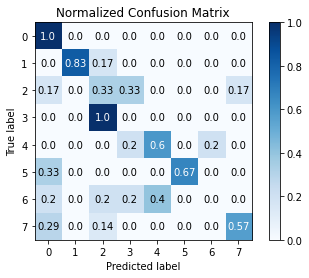

In [20]:
import scikitplot as skplt
y_pred1 = model2.predict_classes(X_test)
skplt.metrics.plot_confusion_matrix(y_test_Cat, y_pred1, normalize=True)
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


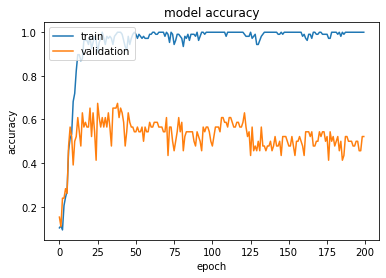

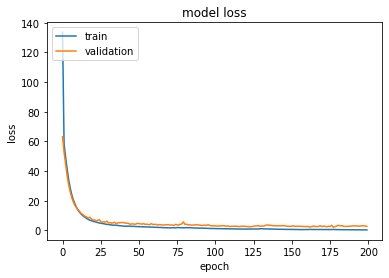

In [21]:
import matplotlib.pyplot as plt
# TODO Draw Graphs
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Standard max pooling if 1D CNN is not used

In [3]:
X = []

POOLING_TYPE = 'max_pooling'

for i in range(data_features_np.shape[0]):
    
    if POOLING_TYPE == 'avg_pooling':
        X.append(np.mean(data_features_np[i], axis = 0))   
    elif POOLING_TYPE == 'max_pooling':
        X.append(np.max(data_features_np[i], axis = 0))    
    elif POOLING_TYPE == 'min_pooling':
        X.append(np.min(data_features_np[i], axis = 0))  

In [4]:
X = np.array(X)
y = data_label_np

In [5]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, stratify = y)

In [6]:
# normalizing the data to help with the training
X_train /= np.max(X_train)
X_test /= np.max(X_train)

In [7]:
X_train.shape[1]

4096

In [8]:
unique , count = np.unique(y_train, return_counts=True)
num_class =  len(unique)

In [9]:
# one-hot encoding using keras' numpy-related utilities
y_test_Cat = y_test
y_train = np_utils.to_categorical(y_train, num_class)
y_test = np_utils.to_categorical(y_test, num_class)

In [10]:
import keras
#clear the previous model
keras.backend.clear_session()

In [11]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_acc"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

my_callback = MyThresholdCallback(threshold=0.78)

In [12]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout

#defining the model architecture to predict the class
model3 = Sequential()
model3.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(8, activation='softmax'))

In [13]:
# compiling the model
model3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
# training the model
history = model3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=16, callbacks=[my_callback])

Train on 107 samples, validate on 46 samples
Epoch 1/200
107/107 [==============================] - 2s 17ms/sample - loss: 2.4663 - acc: 0.1402 - val_loss: 6.0137 - val_acc: 0.1304
Epoch 2/200
107/107 [==============================] - 0s 388us/sample - loss: 3.2227 - acc: 0.1215 - val_loss: 9.0168 - val_acc: 0.1304
Epoch 3/200
107/107 [==============================] - 0s 386us/sample - loss: 2.8293 - acc: 0.0935 - val_loss: 3.1187 - val_acc: 0.1957
Epoch 4/200
107/107 [==============================] - 0s 357us/sample - loss: 2.5230 - acc: 0.1215 - val_loss: 2.4120 - val_acc: 0.3261
Epoch 5/200
107/107 [==============================] - 0s 430us/sample - loss: 2.2946 - acc: 0.1776 - val_loss: 2.3992 - val_acc: 0.1739
Epoch 6/200
107/107 [==============================] - 0s 417us/sample - loss: 2.3702 - acc: 0.1121 - val_loss: 2.0119 - val_acc: 0.2826
Epoch 7/200
107/107 [==============================] - 0s 386us/sample - loss: 2.2744 - acc: 0.1121 - val_loss: 1.8890 - val_acc: 0.13

Epoch 60/200
107/107 [==============================] - 0s 368us/sample - loss: 0.6988 - acc: 0.7290 - val_loss: 3.0313 - val_acc: 0.6522
Epoch 61/200
107/107 [==============================] - 0s 357us/sample - loss: 0.7399 - acc: 0.6822 - val_loss: 3.6965 - val_acc: 0.6087
Epoch 62/200
107/107 [==============================] - 0s 375us/sample - loss: 0.6765 - acc: 0.7290 - val_loss: 4.5806 - val_acc: 0.6522
Epoch 63/200
107/107 [==============================] - 0s 317us/sample - loss: 0.6460 - acc: 0.7477 - val_loss: 4.1128 - val_acc: 0.6522
Epoch 64/200
107/107 [==============================] - 0s 317us/sample - loss: 0.7056 - acc: 0.7290 - val_loss: 3.3545 - val_acc: 0.6957
Epoch 65/200
107/107 [==============================] - 0s 368us/sample - loss: 0.6695 - acc: 0.6822 - val_loss: 5.4079 - val_acc: 0.6304
Epoch 66/200
107/107 [==============================] - 0s 369us/sample - loss: 0.6800 - acc: 0.7383 - val_loss: 5.2982 - val_acc: 0.6304
Epoch 67/200
107/107 [============

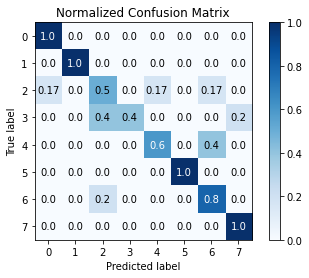

In [15]:
import scikitplot as skplt
y_pred1 = model3.predict_classes(X_test)
skplt.metrics.plot_confusion_matrix(y_test_Cat, y_pred1, normalize=True)
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


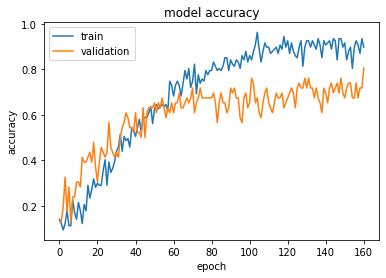

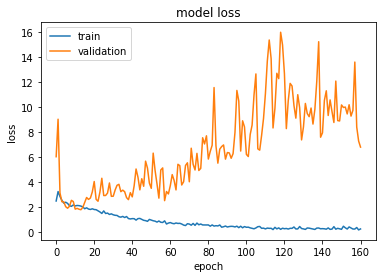

In [16]:
import matplotlib.pyplot as plt
# TODO Draw Graphs
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()